In [24]:
# %matplotlib nbagg
# %matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import os
import time
import pickle
from datetime import datetime

sys.path.append("..")
# 自分のpath
os.chdir("/home/nakamura/HAI/main_server/hai")

import coloredlogs, logging
logger = logging.getLogger(__name__)
coloredlogs.install(level='CRITICAL', logger=logger)

import pymongo
from pymongo import MongoClient
from PIL import Image
from matplotlib import pylab as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation
import numpy as np
import scipy
from bson.objectid import ObjectId
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from notebooks.utils.utils import visualize, display_latest_image, display_image, print_time, strtime_to_epoch, epoch_to_strtime, UpdateDist, display_two_images
from controllers.learner.img2vec import NNFeatures
import controllers.learner.datasets as ds
from controllers.tests.hue_controller import HueLv2
from controllers.dbreader.hue_koki_dbreader import HueDBReader, pair_images, extract_color

mongo = MongoClient('localhost', 20202).hai
from flask import Flask
app = Flask(__name__)
app.config.from_pyfile(filename="application.cfg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [4]:
epoch_to_strtime(time.time())

'2017-12-17 15:38:51'

In [5]:
start = strtime_to_epoch("2017-12-17 14:03:00")
end = strtime_to_epoch("2017-12-17 15:18:00")

In [17]:
img0_cols = mongo.images.find({'cam_id': 'webcam0', 'time': {'$gt': start, '$lt': end}})
img1_cols = mongo.images.find({'cam_id': 'webcam1', 'time': {'$gt': start, '$lt': end}})

In [18]:
img0_cols.count()

1073

In [19]:
imgs_cols = np.array(pair_images(img0_cols, img1_cols))

<IPython.core.display.Javascript object>


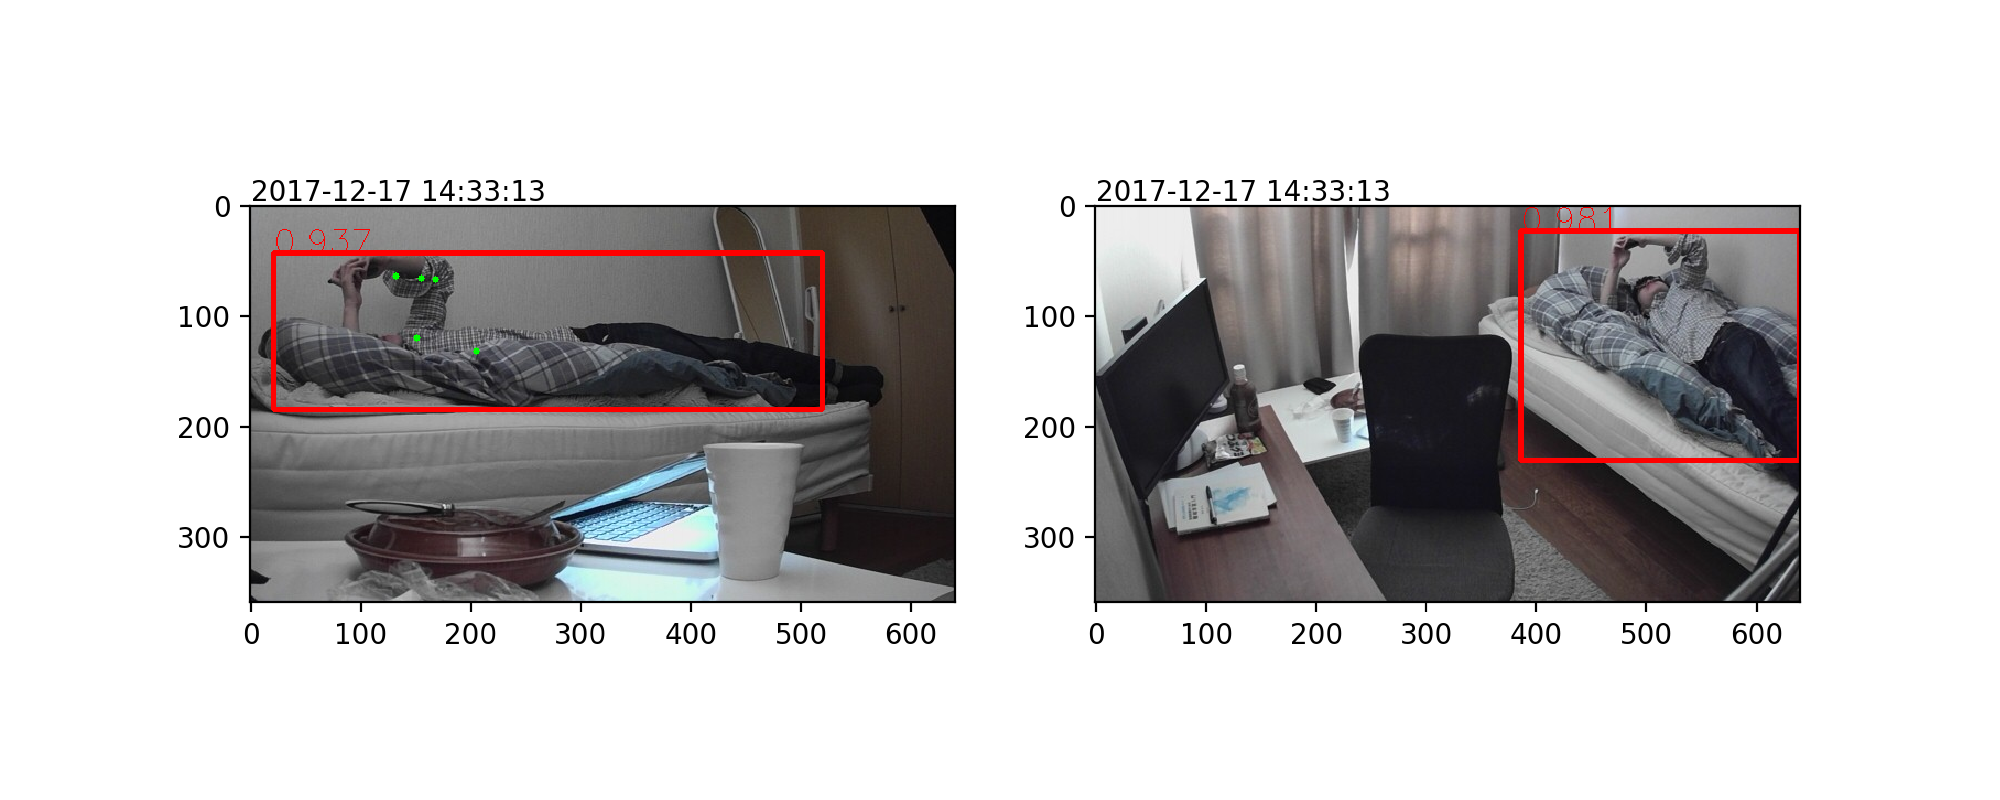

In [25]:
%matplotlib nbagg
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
ud = UpdateDist(axL, axR, imgs_cols, pose=True, human=True)
ani = animation.FuncAnimation(fig, ud, frames=range(ud.length), interval=200)
ani.save('1217-noguchi.mp4', writer="ffmpeg")
# fig.show()